In [372]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [373]:
sales_data = pd.read_csv('sales.csv')
sales_data

C:\Users\Manish_Bhoge\AppData\Local\Temp\ipykernel_18568\3671999420.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv('sales.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [374]:
store_data = pd.read_csv('store.csv')
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [375]:
sales_store_joined_df = pd.merge(sales_data, store_data, how='left', on=['Store'])

# Ignore the customer column for this analysis, since we might not know the customer count for future dates

In [376]:
sales_store_final_df = sales_store_joined_df.query('Sales!=0').drop(['Customers'], axis=1) ## 172871 rows × 18 columns

# Split the Dataset into the Features and Target variables

In [377]:
features = sales_store_final_df.iloc[ : ,sales_store_final_df.columns != 'Sales']
features

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


In [378]:
target = sales_store_final_df.iloc[:, sales_store_final_df.columns == 'Sales'] #outcome predicted target or dependent variable
target

,Sales
0,5263
1,6064
2,8314
3,13995
4,4822
...,...
1016776,3375
1016827,10765
1016863,5035
1017042,4491


In [379]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Open                       844338 non-null  int64  
 4   Promo                      844338 non-null  int64  
 5   StateHoliday               844338 non-null  object 
 6   SchoolHoliday              844338 non-null  int64  
 7   StoreType                  844338 non-null  object 
 8   Assortment                 844338 non-null  object 
 9   CompetitionDistance        842152 non-null  float64
 10  CompetitionOpenSinceMonth  575738 non-null  float64
 11  CompetitionOpenSinceYear   575738 non-null  float64
 12  Promo2                     844338 non-null  int64  
 13  Promo2SinceWeek            4

In [381]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,844338.0,558.421374,321.730861,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844338.0,3.520350,1.723712,1.0,2.0,3.0,5.0,7.0
Open,844338.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Promo,844338.0,0.446356,0.497114,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,844338.0,0.193578,0.395102,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,842152.0,5458.156627,7809.573181,20.0,710.0,2320.0,6890.0,75860.0
CompetitionOpenSinceMonth,575738.0,7.224842,3.210118,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,575738.0,2008.697753,5.978064,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,844338.0,0.498670,0.499999,0.0,0.0,0.0,1.0,1.0
Promo2SinceWeek,421046.0,23.254177,14.100647,1.0,13.0,22.0,37.0,50.0


# Summary Explanation
1. Standard Deviation of columns Store, CompetitionDistance are very high we need to normalize/standardize these columns.
2. Standard Deviation of Open column is 0. so, this column can be excluded from the analysis 

In [382]:
features = features.drop(['Open'], axis=1)

In [383]:
features

,Store,DayOfWeek,Date,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


In [384]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Promo                      844338 non-null  int64  
 4   StateHoliday               844338 non-null  object 
 5   SchoolHoliday              844338 non-null  int64  
 6   StoreType                  844338 non-null  object 
 7   Assortment                 844338 non-null  object 
 8   CompetitionDistance        842152 non-null  float64
 9   CompetitionOpenSinceMonth  575738 non-null  float64
 10  CompetitionOpenSinceYear   575738 non-null  float64
 11  Promo2                     844338 non-null  int64  
 12  Promo2SinceWeek            421046 non-null  float64
 13  Promo2SinceYear            4

# Split the features into Numerical and Categorical variables

In [385]:
df_num_features = features.select_dtypes(include='number')
df_cat_features = features.select_dtypes(include='object')

# We'll look at the SimpleImputer to replace missing values in numeric column values with the Median 

In [386]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [387]:
imputer.fit(df_num_features)


SimpleImputer(strategy='median')

In [388]:
X = imputer.transform(df_num_features)

In [389]:
df_num_features_imptd = pd.DataFrame(X, columns = df_num_features.columns, index=df_num_features.index)

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

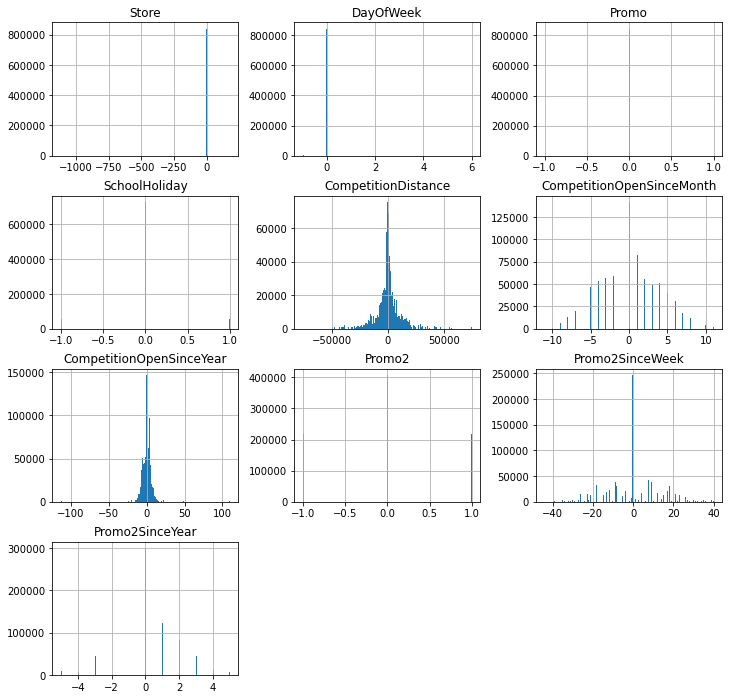

In [390]:
df_num_features_imptd[df_num_features_imptd.columns].diff().hist(bins=200, figsize=(12,12))

In [391]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_num_features_scaled = std_scaler.fit_transform(df_num_features_imptd)

In [392]:
df_num_features_scaled

array([[-1.73257145,  0.85840958,  1.11371728, ..., -0.99734346,
        -0.06268552,  0.10404826],
       [-1.72946326,  0.85840958,  1.11371728, ...,  1.00266362,
        -0.96475054, -1.59181976],
       [-1.72635507,  0.85840958,  1.11371728, ...,  1.00266362,
        -0.8645211 , -0.74388575],
       ...,
       [ 0.65451834, -0.88202104, -0.89789395, ...,  1.00266362,
         2.54328012,  0.10404826],
       [ 1.21088432, -0.88202104, -0.89789395, ..., -0.99734346,
        -0.06268552,  0.10404826],
       [ 1.67400461, -0.88202104, -0.89789395, ..., -0.99734346,
        -0.06268552,  0.10404826]])

In [393]:
scaled_num_df = pd.DataFrame(df_num_features_scaled,columns = df_num_features_imptd.columns).astype('float64')

In [394]:
scaled_num_df

,Store,DayOfWeek,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,-1.732571,0.858410,1.113717,2.04105,-0.535827,0.571371,-0.223587,-0.997343,-0.062686,0.104048
1,-1.729463,0.858410,1.113717,2.04105,-0.625558,1.318962,-0.424650,1.002664,-0.964751,-1.591820
2,-1.726355,0.858410,1.113717,2.04105,1.112662,1.692758,-0.625712,1.002664,-0.864521,-0.743886
3,-1.723247,0.858410,1.113717,2.04105,-0.619149,0.571371,-0.022524,-0.997343,-0.062686,0.104048
4,-1.720139,0.858410,1.113717,2.04105,3.135458,-1.297607,1.183854,-0.997343,-0.062686,0.104048
...,...,...,...,...,...,...,...,...,...,...
844333,0.384106,-0.882021,-0.897894,2.04105,-0.679397,0.571371,-0.625712,-0.997343,-0.062686,0.104048
844334,0.542624,-0.882021,-0.897894,2.04105,-0.588384,0.945167,-2.033153,-0.997343,-0.062686,0.104048
844335,0.654518,-0.882021,-0.897894,2.04105,-0.590948,0.197575,0.178539,1.002664,2.543280,0.104048
844336,1.210884,-0.882021,-0.897894,2.04105,-0.515317,0.197575,0.178539,-0.997343,-0.062686,0.104048


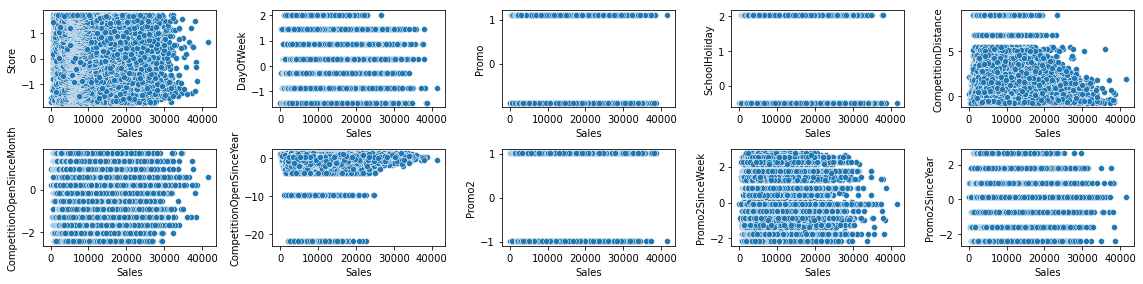

In [395]:
scaled_num_df_wth_tgt = pd.concat([scaled_num_df, target], axis=1, join='inner')

rows = 2
cols = 5
fig, ax = plt.subplots(rows, cols, figsize = (16,4))
col = df_num_features_imptd_wth_tgt.columns
index = 0 
for i in range(rows):
    for j in range(cols):
        sns.scatterplot(x='Sales', y=col[index], data = df_num_features_imptd_wth_tgt, ax = ax[i][j])
        index = index + 1
plt.tight_layout()      

In [396]:
corr_mat = scaled_num_df_wth_tgt.corr()

<AxesSubplot:>

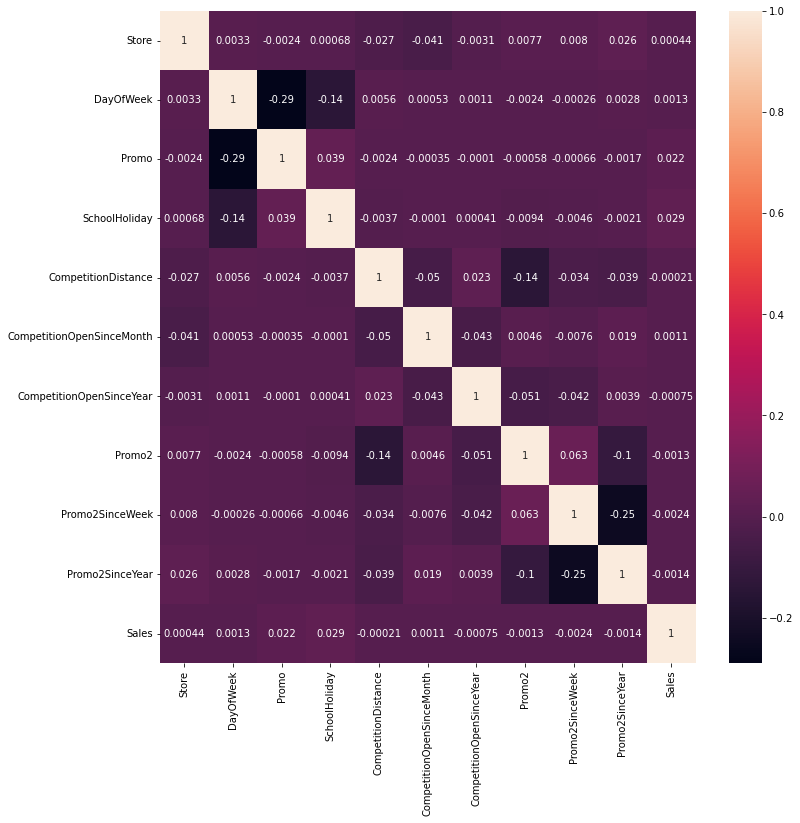

In [397]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_mat, annot=True)

# The below list of columns are missing data values:
CompetitionDistance, 
CompetitionOpenSinceMonth,
CompetitionOpenSinceYear,
Promo2SinceWeek,
Promo2SinceYear,
PromoInterval,

In [398]:
df_cat_features = df_cat_features.drop(['Date','StateHoliday'], axis =1)

# Now, let's deal with the Categorical variables

In [399]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df_cat_features)

SimpleImputer(strategy='most_frequent')

In [400]:
Y = imputer.transform(df_cat_features)

In [401]:
df_cat_features_imptd = pd.DataFrame(Y, columns = df_cat_features.columns, index=df_cat_features.index)

In [402]:
df_cat_features_imptd.isnull().sum()

StoreType        0
Assortment       0
PromoInterval    0
dtype: int64

In [403]:
df_cat_features_imptd

,StoreType,Assortment,PromoInterval
0,c,a,"Jan,Apr,Jul,Oct"
1,a,a,"Jan,Apr,Jul,Oct"
2,a,a,"Jan,Apr,Jul,Oct"
3,c,c,"Jan,Apr,Jul,Oct"
4,a,a,"Jan,Apr,Jul,Oct"
...,...,...,...
1016776,b,a,"Jan,Apr,Jul,Oct"
1016827,b,b,"Jan,Apr,Jul,Oct"
1016863,b,b,"Jan,Apr,Jul,Oct"
1017042,b,b,"Jan,Apr,Jul,Oct"


# Now there is NO missing values in the categorical columns too

In [404]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cate_features_encded = cat_encoder.fit_transform(df_cat_features_imptd)

In [405]:
encoded_cat_feature = cat_encoder.get_feature_names_out(['StoreType','Assortment','PromoInterval'])

In [407]:
encoded_cat_df = pd.DataFrame(df_cate_features_encded.toarray(),columns = encoded_cat_feature).astype('int64')

# Combine the datasets to form with original dataframe

In [412]:
final_sales_store_df = pd.concat([scaled_num_df, encoded_cat_df], axis=1, join='inner')

In [413]:
final_sales_store_df

,Store,DayOfWeek,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,-1.732571,0.858410,1.113717,2.04105,-0.535827,0.571371,-0.223587,-0.997343,-0.062686,0.104048,0,0,1,0,1,0,0,0,1,0
1,-1.729463,0.858410,1.113717,2.04105,-0.625558,1.318962,-0.424650,1.002664,-0.964751,-1.591820,1,0,0,0,1,0,0,0,1,0
2,-1.726355,0.858410,1.113717,2.04105,1.112662,1.692758,-0.625712,1.002664,-0.864521,-0.743886,1,0,0,0,1,0,0,0,1,0
3,-1.723247,0.858410,1.113717,2.04105,-0.619149,0.571371,-0.022524,-0.997343,-0.062686,0.104048,0,0,1,0,0,0,1,0,1,0
4,-1.720139,0.858410,1.113717,2.04105,3.135458,-1.297607,1.183854,-0.997343,-0.062686,0.104048,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,0.384106,-0.882021,-0.897894,2.04105,-0.679397,0.571371,-0.625712,-0.997343,-0.062686,0.104048,0,1,0,0,1,0,0,0,1,0
844334,0.542624,-0.882021,-0.897894,2.04105,-0.588384,0.945167,-2.033153,-0.997343,-0.062686,0.104048,0,1,0,0,0,1,0,0,1,0
844335,0.654518,-0.882021,-0.897894,2.04105,-0.590948,0.197575,0.178539,1.002664,2.543280,0.104048,0,1,0,0,0,1,0,0,1,0
844336,1.210884,-0.882021,-0.897894,2.04105,-0.515317,0.197575,0.178539,-0.997343,-0.062686,0.104048,0,1,0,0,0,1,0,0,1,0


In [414]:
final_sales_store_df.describe()

,Store,DayOfWeek,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
count,8.443380e+05,8.443380e+05,8.443380e+05,8.443380e+05,8.443380e+05,8.443380e+05,8.443380e+05,8.443380e+05,8.443380e+05,8.443380e+05,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,-1.358269e-16,-1.003024e-14,-9.872465e-14,1.281380e-14,2.755333e-16,-1.450419e-15,-2.219034e-14,-1.186428e-13,1.862449e-14,9.298893e-14,0.541302,0.018429,0.133795,0.306474,0.526892,0.009722,0.463386,0.116065,0.788415,0.095520
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.498292,0.134496,0.340432,0.461029,0.499277,0.098122,0.498658,0.320303,0.408432,0.293932
min,-1.732571e+00,-1.462165e+00,-8.978939e-01,-4.899439e-01,-6.960613e-01,-2.418993e+00,-2.193839e+01,-9.973435e-01,-2.167504e+00,-2.439754e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.653865e-01,-8.820210e-01,-8.978939e-01,-4.899439e-01,-6.076121e-01,-5.500156e-01,-2.235866e-01,-9.973435e-01,-6.268552e-02,1.040483e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.309710e-03,-3.018775e-01,-8.978939e-01,-4.899439e-01,-4.012305e-01,1.975755e-01,1.785393e-01,-9.973435e-01,-6.268552e-02,1.040483e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.658753e-01,8.584096e-01,1.113717e+00,-4.899439e-01,1.833038e-01,5.713710e-01,3.796023e-01,1.002664e+00,-6.268552e-02,1.040483e-01,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.729952e+00,2.018697e+00,1.113717e+00,2.041050e+00,9.025666e+00,1.692758e+00,1.183854e+00,1.002664e+00,2.743739e+00,2.647850e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [415]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_sales_store_df, target, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression Model on Training Dataset

In [427]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [428]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)


In [429]:
print(regressor.coef_)

[[ 1.52e+01 -2.53e+02  1.08e+03  5.29e+01 -1.89e+02 -1.02e+02  2.59e+00
  -3.17e+02  1.88e+02 -4.52e+01 -1.20e+03  3.85e+03 -1.26e+03 -1.40e+03
   6.56e+02 -2.21e+03  1.55e+03  2.54e+01  2.76e+02 -3.01e+02]]


In [430]:
print(regressor.intercept_)

[6893.72]
